In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/housing.csv')
df.head()


sns.set(style="whitegrid")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


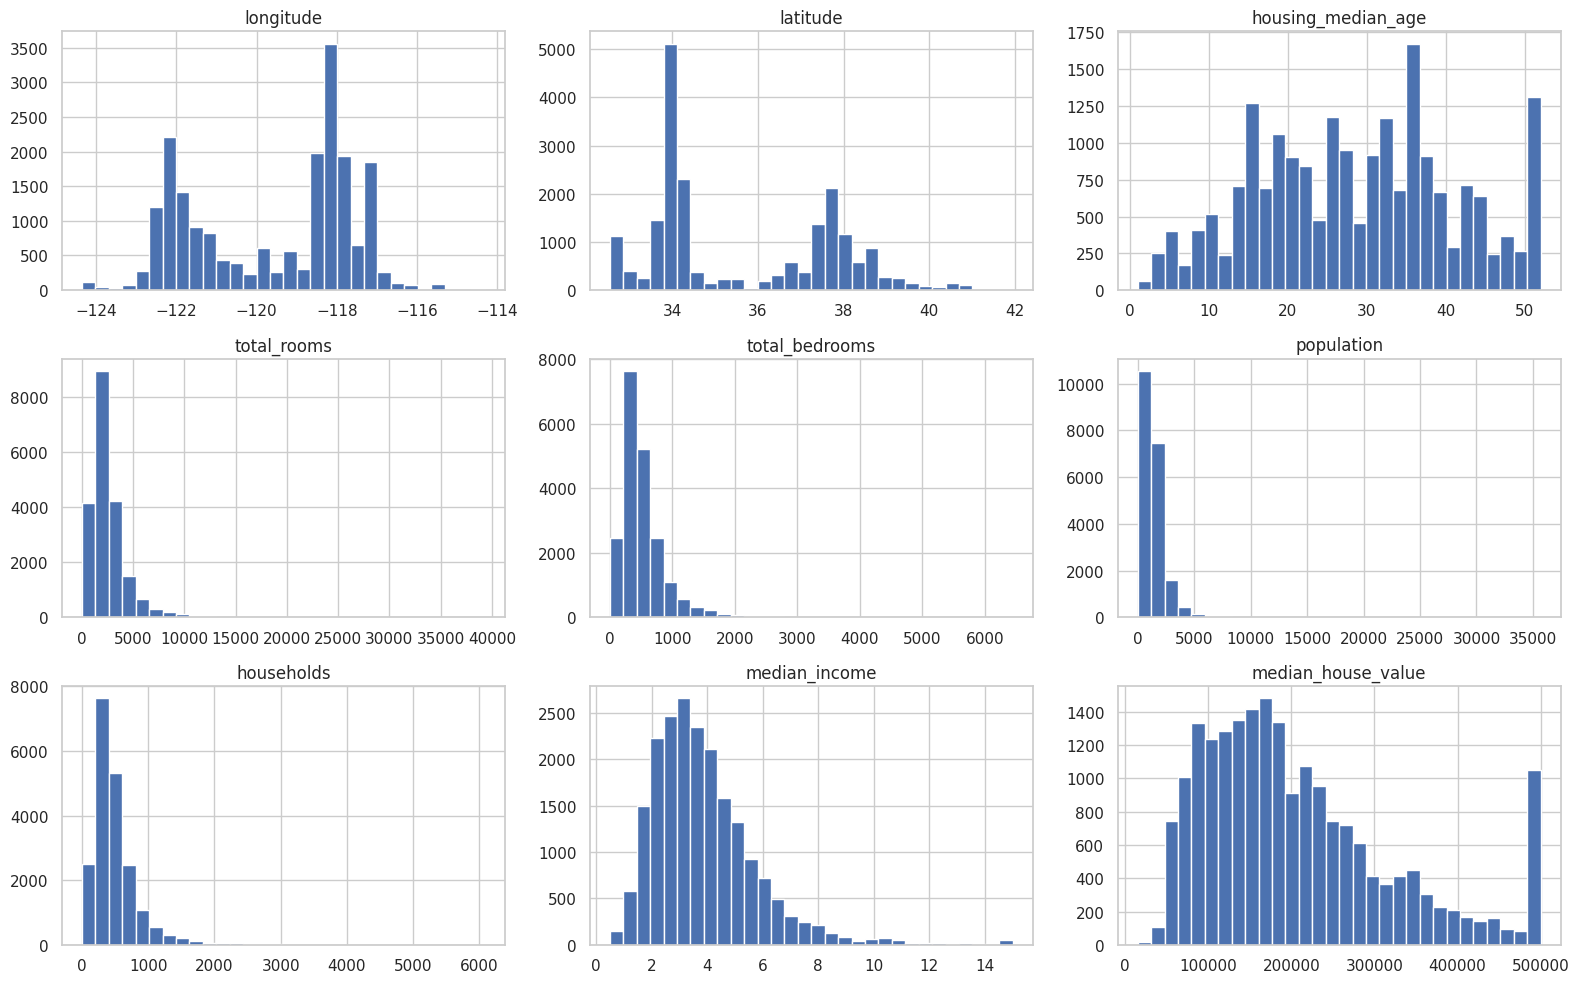

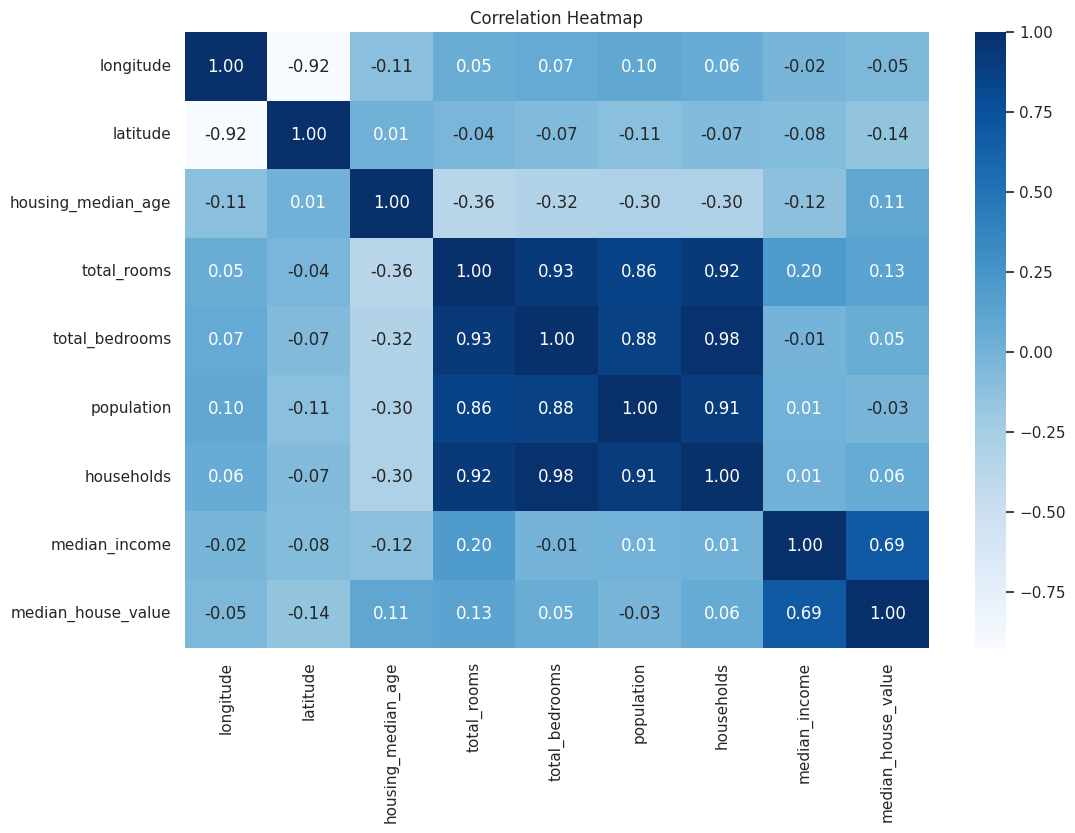

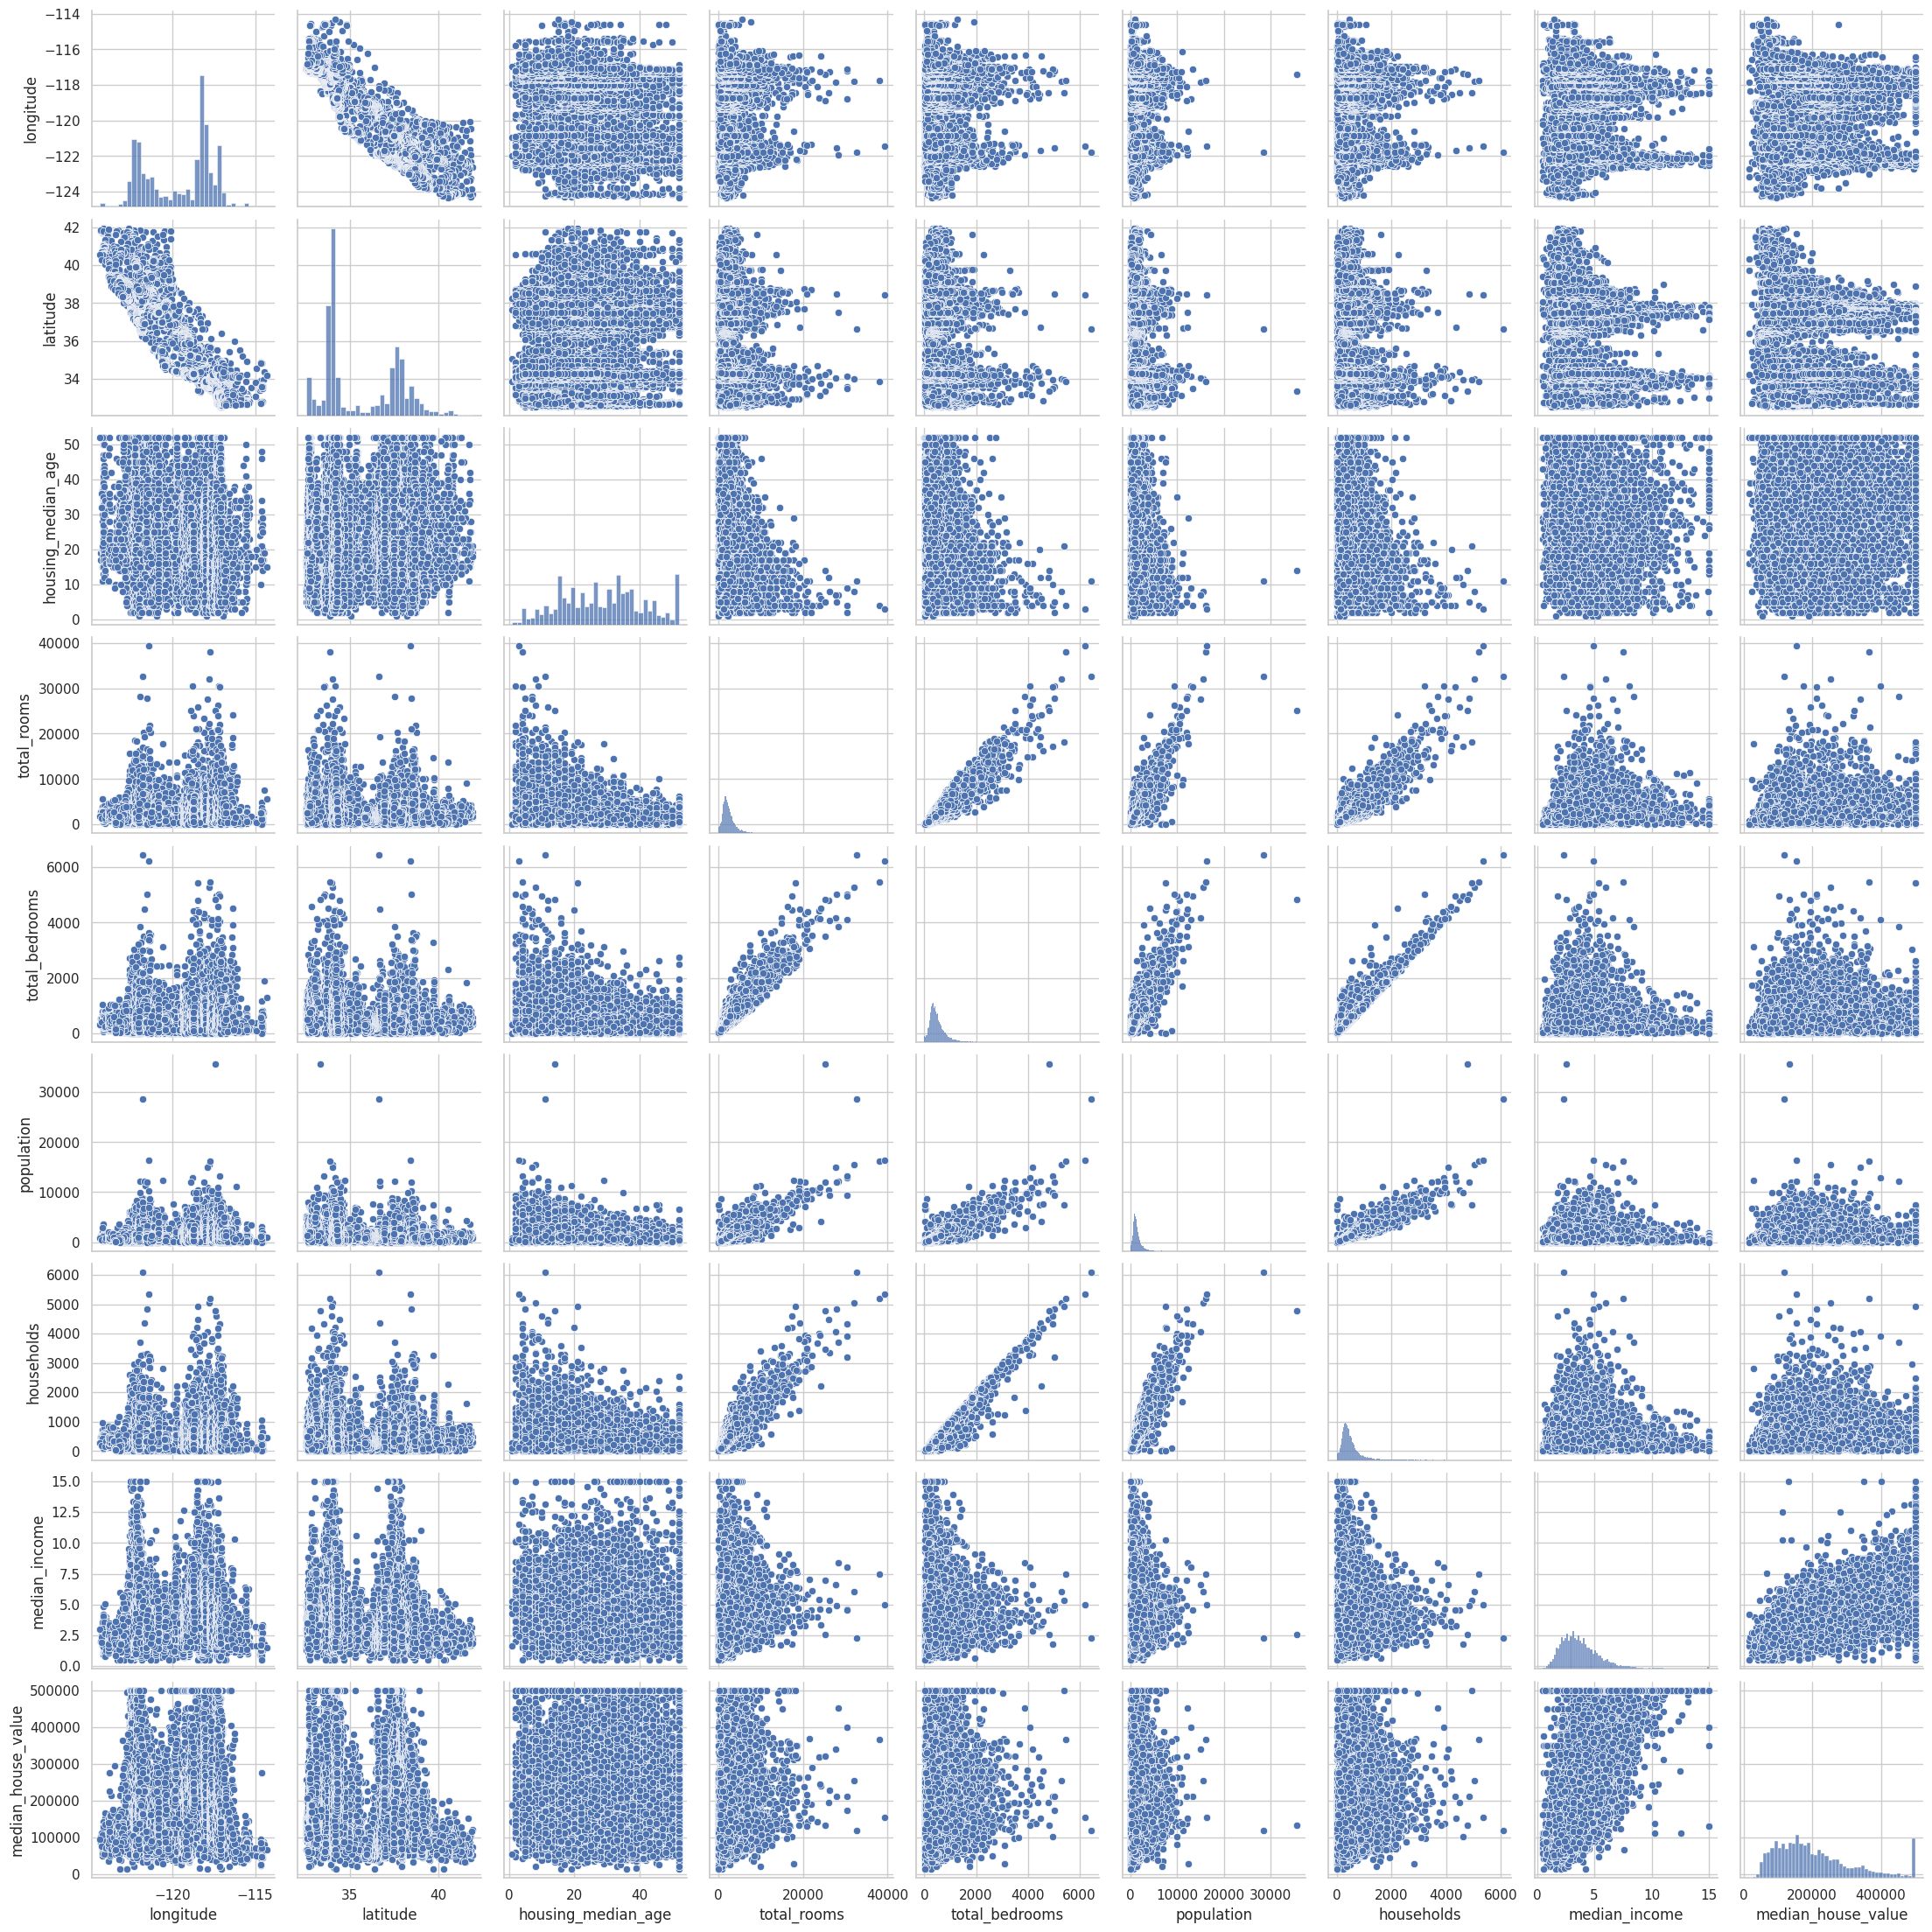

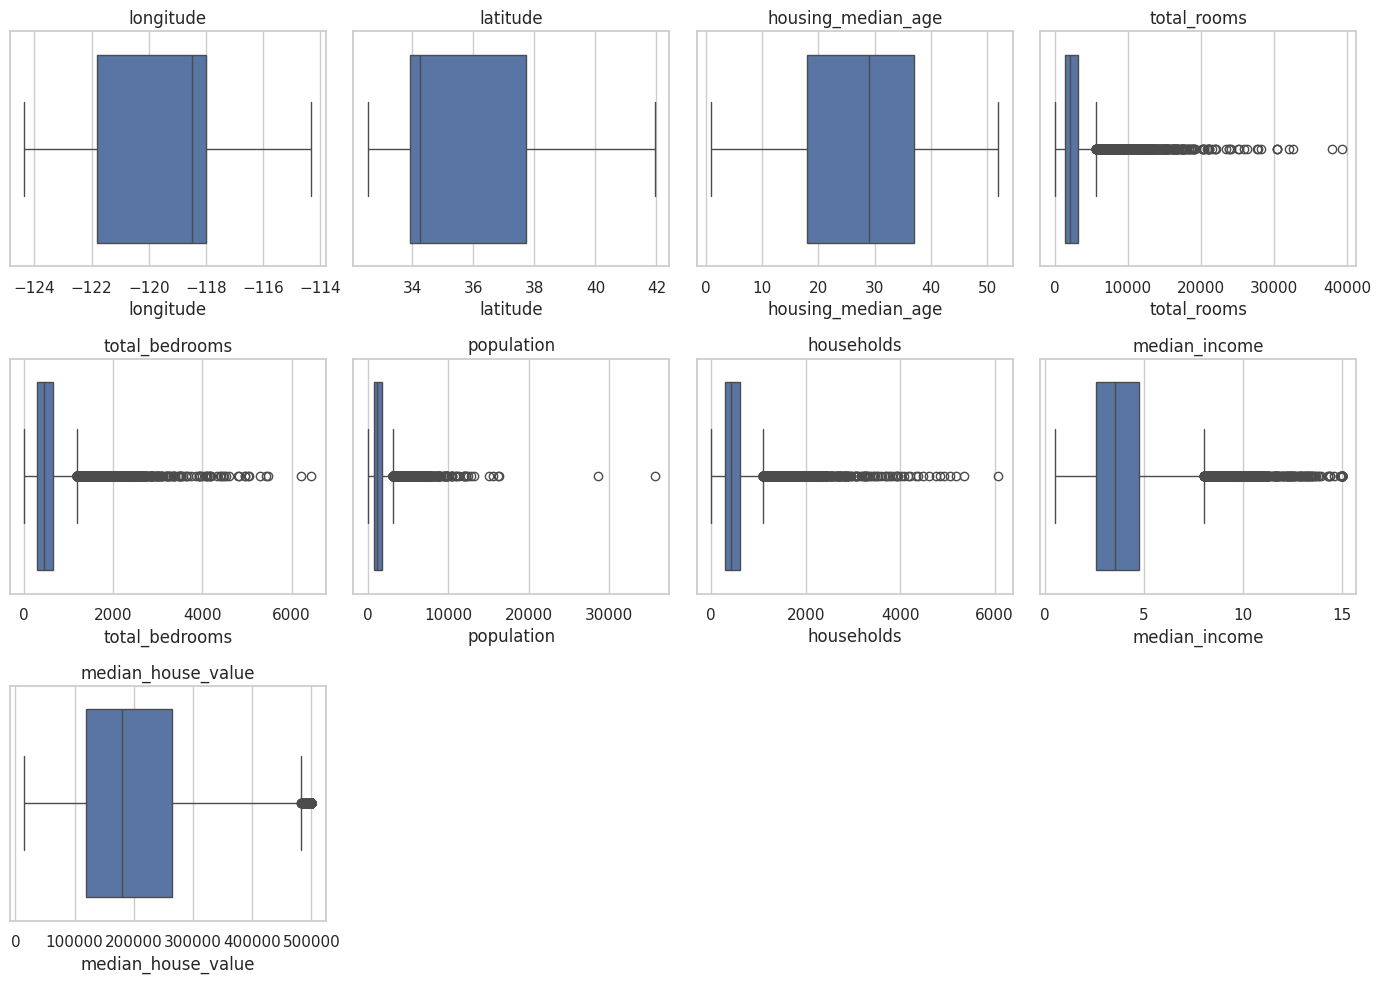

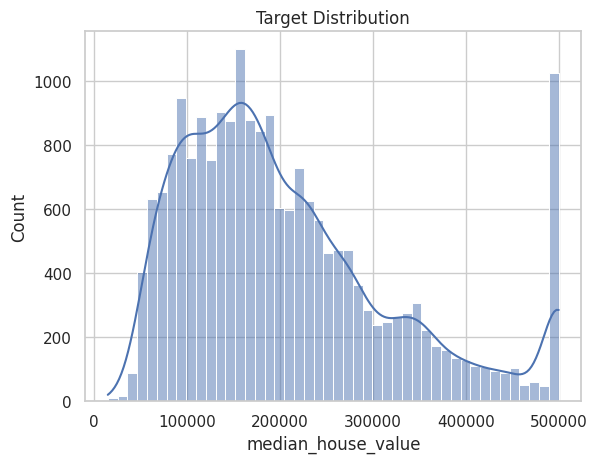

In [13]:
df = pd.read_csv('/content/housing.csv')
df.head()
df.shape
df.info()
df.isnull().sum()
df = df.dropna()
df.describe()
df.columns
df.hist(figsize=(16,10), bins=30)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df)
plt.show()
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()
target = 'median_house_value'   # change to match your dataset
sns.histplot(df[target], kde=True)
plt.title('Target Distribution')
plt.show()




In [14]:
df.head()
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [17]:
df.info()
df.describe()
df.isnull().sum()

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

df.isnull().sum()

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df.head()

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df.to_csv('/content/housing_cleaned.csv', index=False)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [19]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R²:", lr_r2)


Linear Regression Performance
MAE: 50888.66001572008
RMSE: 72668.53837868226
R²: 0.5970176824350761


In [21]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

knn_mae, knn_rmse, knn_r2 = evaluate_model(y_test, y_pred_knn)

print("KNN Regressor Performance")
print("MAE:", knn_mae)
print("RMSE:", knn_rmse)
print("R²:", knn_r2)


KNN Regressor Performance
MAE: 41745.59985465116
RMSE: 62106.74767693322
R²: 0.7056454762554938


In [23]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1)

rf.fit(X_train, y_train)  # Random Forest does NOT need scaling

y_pred_rf = rf.predict(X_test)

rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)


Random Forest Performance
MAE: 32250.569246608527
RMSE: 50268.15081690922
R²: 0.8071680651987262


In [24]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "KNN Regressor", "Random Forest"],
    "MAE": [lr_mae, knn_mae, rf_mae],
    "RMSE": [lr_rmse, knn_rmse, rf_rmse],
    "R²": [lr_r2, knn_r2, rf_r2]})

results.sort_values(by="RMSE")


,Model,MAE,RMSE,R²
2,Random Forest,32250.569247,50268.150817,0.807168
1,KNN Regressor,41745.599855,62106.747677,0.705645
0,Linear Regression,50888.660016,72668.538379,0.597018


In [25]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
7,median_income,0.481611
8,ocean_proximity_INLAND,0.137512
14,population_per_household,0.121601
0,longitude,0.058030
1,latitude,0.056353
2,housing_median_age,0.044355
12,rooms_per_household,0.025934
13,bedrooms_per_room,0.024182
3,total_rooms,0.012673
4,total_bedrooms,0.012297
